In [2]:
!pip install tweepy transformers torch pandas --quiet


In [3]:
import tweepy
import pandas as pd
from transformers import pipeline

# 🔑 Your API Key (Replace with yours)
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAMDZ4wEAAAAAQp8UvIDh0FcT%2F0jRNpgfetZTXW4%3Dl8I71fF2JPk0Slp3vdOGtQWMbQWOmvPmh6KwAjWLlWCKONBvxu"

# Initialize Tweepy client
client = tweepy.Client(bearer_token=BEARER_TOKEN)


In [4]:
# Define your topic
query = "stock market -is:retweet lang:en"

# Fetch tweets (up to 100)
tweets = client.search_recent_tweets(query=query, max_results=100)

# Store tweets in a DataFrame
data = []
for tweet in tweets.data:
    data.append(tweet.text)

df = pd.DataFrame(data, columns=["tweet"])
df.head(10)


,tweet
0,Reeves’ tax grab could ‘wipe £4bn out of the s...
1,"@kz2468 Learn more on how to invest smart, tra..."
2,"@kz2468 Learn more on how to invest smart, tra..."
3,@osazenoo Join Bamboo and start your journey t...
4,@osazenoo Join Bamboo and start your journey t...
5,@Debabrata_222 Defence\nPower\nCapital Market\...
6,@Ram0567339005 Learn more on how to invest sma...
7,"Dow Jones Futures: Netflix Falls, Google Rises..."
8,@MatanIzenberg Learn more on how to invest sma...
9,Vertiv Posts Strong Earnings in ‘AI-Driven Mar...


In [5]:
# Load pretrained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply sentiment analysis
df["sentiment"] = df["tweet"].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])
df["confidence"] = df["tweet"].apply(lambda x: sentiment_pipeline(x[:512])[0]['score'])

df.head(10)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


,tweet,sentiment,confidence
0,Reeves’ tax grab could ‘wipe £4bn out of the s...,NEGATIVE,0.998837
1,"@kz2468 Learn more on how to invest smart, tra...",POSITIVE,0.972441
2,"@kz2468 Learn more on how to invest smart, tra...",POSITIVE,0.972441
3,@osazenoo Join Bamboo and start your journey t...,POSITIVE,0.997841
4,@osazenoo Join Bamboo and start your journey t...,POSITIVE,0.997949
5,@Debabrata_222 Defence\nPower\nCapital Market\...,NEGATIVE,0.992288
6,@Ram0567339005 Learn more on how to invest sma...,POSITIVE,0.913343
7,"Dow Jones Futures: Netflix Falls, Google Rises...",NEGATIVE,0.994172
8,@MatanIzenberg Learn more on how to invest sma...,POSITIVE,0.957941
9,Vertiv Posts Strong Earnings in ‘AI-Driven Mar...,POSITIVE,0.996450


In [6]:
df.to_csv("twitter_sentiment_data.csv", index=False)
print("✅ Data saved to twitter_sentiment_data.csv")


✅ Data saved to twitter_sentiment_data.csv


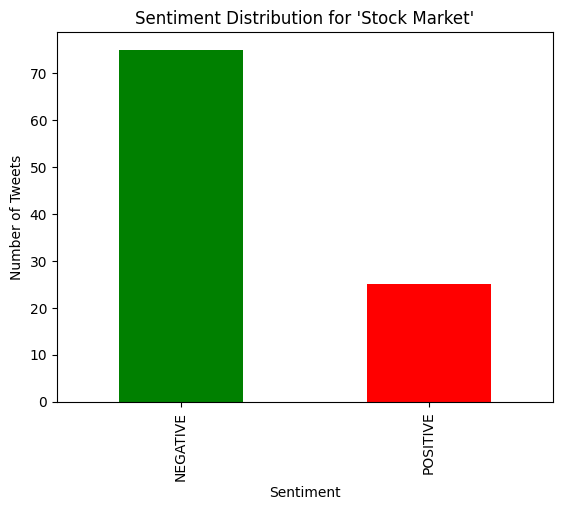

In [7]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Sentiment Distribution for 'Stock Market'")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()
